In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.datasets


In [2]:
#house_price_dataset = sklearn.datasets.load_boston()

In [3]:
#print(house_price_dataset)

In [4]:
## Loading the dataset to a Pandas DataFrame
#house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)


In [5]:
#house_price_dataframe.head()

In [6]:
housing_data = pd.read_csv("E:\MY DOCUMENTS\Project\\boston11.csv")

In [7]:
housing_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
housing_data["CHAS"].value_counts()


0    471
1     35
Name: CHAS, dtype: int64

In [10]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285560,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705752,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884750,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.621500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Train test split

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing_data,test_size = 0.2,random_state =42)
print(f"Rows in train_set : {len(train_set)}\nRows in test_set:{len(test_set)}\n")
      

Rows in train_set : 404
Rows in test_set:102



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split =StratifiedShuffleSplit(n_splits = 1,test_size=0.2,random_state =42)
for train_index,test_index in split.split(housing_data,housing_data["CHAS"]):
    strat_train_set =housing_data.loc[train_index]
    strat_test_set =housing_data.loc[test_index]
    


In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
376/28

13.428571428571429

In [16]:
95/7

13.571428571428571

In [17]:
housing_data1 = strat_train_set.copy()
housing_data1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280204,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715205,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


# co realtion 

In [18]:
cor_matrix =housing_data.corr()

In [19]:
cor_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695081
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='DIS', ylabel='MEDV'>,
        <AxesSubplot:xlabel='CHAS', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='DIS', ylabel='RM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='DIS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='DIS'>,
        <AxesSubplot:xlabel='RM', ylabel='DIS'

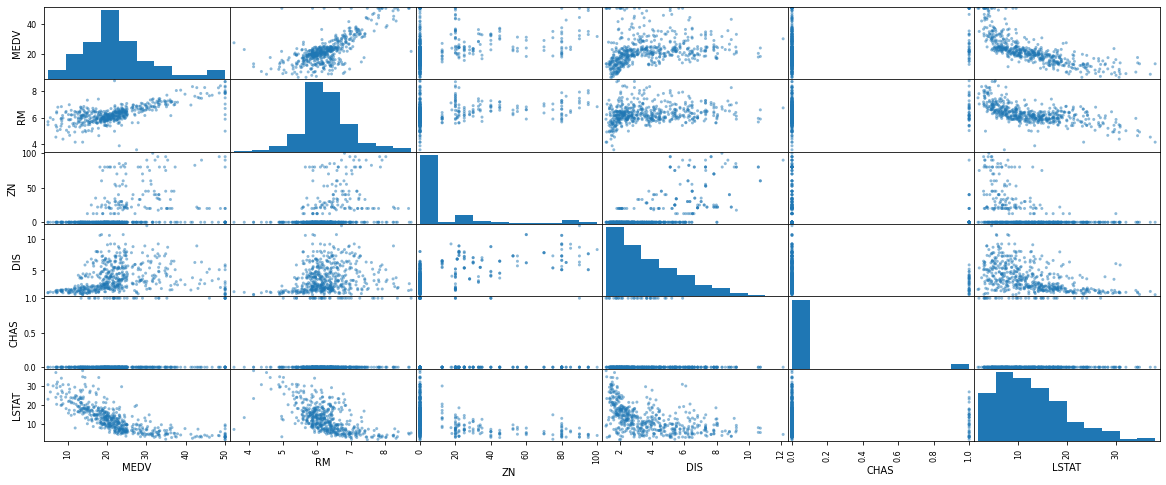

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","DIS","CHAS","LSTAT"]
scatter_matrix(housing_data[attributes],figsize=(20,8))

In [21]:
#housing_data.plot(kind= "scatter",x="RM",y="MEDV",alpha =0.8)

In [22]:
housing_data2 =strat_train_set.drop("MEDV",axis = 1)
housing_data2.describe()# RM = 401

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280204,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715205,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [23]:
housing_labels = strat_train_set["MEDV"].copy()
housing_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

####  Missing variable

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(housing_data2)

imputer.statistics_

array([3.60281403e+00, 1.08366337e+01, 1.13449505e+01, 6.93069307e-02,
       5.58063614e-01, 6.28020449e+00, 6.90398515e+01, 3.74620965e+00,
       9.73514851e+00, 4.12341584e+02, 1.84732673e+01, 3.53392822e+02,
       1.27916089e+01])

In [25]:
X =imputer.transform(housing_data2)
housing_data2_tr =pd.DataFrame(X,columns=housing_data2.columns)

In [26]:
housing_data2_tr.describe() # RM = 404 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280204,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712538,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


#### Feature scaling
1.normalization = (value-min)/(max-min)
2.standerdization = (value-mean)/std

###  Create Pipeline

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [28]:
housing_num_trans = my_pipeline.fit_transform(housing_data2) # transform train data

In [29]:
housing_num_trans

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

### Selecting Desired model for house price prediction

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model =  DecisionTreeRegressor()
#model =  LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_trans, housing_labels)

RandomForestRegressor()

In [31]:
housing_data_check = housing_data2.iloc[:5]

In [32]:
housing_labels_check =housing_labels.iloc[:5] 

In [33]:
prepared_data =my_pipeline.transform(housing_data_check)

In [34]:
model.predict(prepared_data)

array([22.401, 25.319, 16.785, 23.376, 23.588])

In [35]:
list(housing_labels_check)

[21.9, 24.5, 16.7, 23.1, 23.0]

### evaluating 

In [36]:
from sklearn.metrics import mean_squared_error
housing_predict = model.predict(housing_num_trans) 
lin_mse =  mean_squared_error(housing_labels,housing_predict )
lin_rmse = np.sqrt(lin_mse)

In [37]:
print(lin_mse) #  compare to list(housing_labels_check) is not good 

1.531678586633661


In [38]:
# change model decision tree error is zero so its zero bias means overfit .

####  Use  better evaluation  technique  

In [39]:
from sklearn.model_selection import cross_val_score
scores  =cross_val_score(model,housing_num_trans,housing_labels ,scoring="neg_mean_squared_error",cv =10)
rmse_score =np.sqrt(-scores)

In [40]:
rmse_score

array([2.78116941, 2.83288541, 4.38023659, 2.68096308, 3.2839749 ,
       2.5902859 , 4.76292868, 3.5081589 , 3.52203213, 3.1999125 ])

In [41]:
def score_predict(scores):
    print("scores:",scores)
    print("mean:",scores.mean())   
    print("Standerd deviation:",scores.std())

In [42]:
score_predict(rmse_score)

scores: [2.78116941 2.83288541 4.38023659 2.68096308 3.2839749  2.5902859
 4.76292868 3.5081589  3.52203213 3.1999125 ]
mean: 3.354254749995903
Standerd deviation: 0.6895520542675205


Linear regression  
       scores: [4.2107692  4.25955682 5.10371342 3.82796741 5.34480822 4.39357159
  7.47443493 5.48588353 4.15275088 6.06163913]  
    mean: 5.0315095131611045  
    Standerd deviation: 1.0600046021115406  
  
  decision tree
      scores: [4.40880494 5.73570333 5.35676003 3.84035059 4.04317326 3.06626809
 5.12381694 3.9207461  3.4362043  4.64445906]   
      mean: 4.357628664669267    
      Standerd deviation: 0.8150612614258691
      
      
    RandomForestRegressor  
      
      
   scores: [2.82378659 3.02697329 4.46791945 2.6442477  3.44405817 2.75939361
 4.82321905 3.26367069 3.07110461 3.22372937]
mean: 3.3548102542788136
Standerd deviation: 0.6897871066356943
 

##  Saving Model

In [43]:
from joblib import dump,load
dump(model,"BOSTON.joblib")

['BOSTON.joblib']

In [44]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test =strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction =model.predict(X_test_prepared )



In [45]:

final_mse =  mean_squared_error(Y_test, final_prediction )

final_rmse = np.sqrt(final_mse)


In [46]:
final_rmse

2.996176216708327

In [47]:
print(final_prediction ,list(Y_test))

[25.051 11.311 25.443 22.052 18.643 15.021 20.025 14.34  31.407 41.271
 19.564 11.747 23.599 27.778 19.503 11.262 31.674 14.403 23.528 18.139
 19.856 17.941 18.71  22.12  18.921 31.294 16.247 32.935  8.77  33.028
 24.031 21.57  22.828 11.307 21.412 11.235 42.583 24.549 23.554 42.281
 23.823 30.074 20.574 21.237 18.694 33.71  45.025 20.237 20.321 22.181
 21.331 14.743 21.567 14.617 25.147 33.797 42.443 28.475 19.66  20.812
 47.008  9.16  18.929 25.137 14.291 32.466 20.073 17.448 18.849 34.7
 26.191 22.882 21.268 21.947 34.312 13.338 15.686 20.352 21.048 21.564
 22.402 20.728 13.902 23.299 20.712 21.426 13.675 22.224 21.145 22.995
 18.724 24.655  7.003 26.252 18.981 29.953 19.927 31.355 14.549 27.272
 21.401 20.054] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

###  Using the model

In [48]:
from joblib import dump,load
import numpy as np
model = load("BOSTON.joblib")

In [49]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24124688, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [50]:
features= np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24124688, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.401])